<a href="https://colab.research.google.com/github/Art-phys/Lesson_HF_LR/blob/main/Python_MachineLearning_Megamodel_SBER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI & Machine Learning for day trading video 1 out 2 summary:
    1 - Import librairies + Live data flow
    2 - Data cleaning
    3 - Calculating the RSI Live
    4 - Visualize the data

# Extra content for beginner:

https://www.udemy.com/course/python-for-algorithmic-trading/?couponCode=FIRST_MONTH

# Step 1a: Import libraries needed

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

#Data visualisation
import plotly.graph_objs as go

# Data import library
#import yfinance as yf
from finam import Exporter, Market, Timeframe

# brew install ta-lib
# Technical indicator library
import talib as ta

# Machine learning libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report #F-Score

ModuleNotFoundError: No module named 'finam'

In [ ]:
#Step 1b: Import Market data

In [ ]:
#df = pd.read_csv('SBER_220118_220119.csv', parse_dates={'Datetime':[0,1]})
df = pd.read_csv('SBER_220118_220119.csv', parse_dates={'Datetime':[0,1]}, index_col='Datetime')
df.head()

,Datetime,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,2022-01-18 07:01:00,258.80,259.39,258.02,258.21,278930
1,2022-01-18 07:02:00,258.31,258.36,257.52,258.00,176050
2,2022-01-18 07:03:00,257.77,258.29,257.50,257.94,156470
3,2022-01-18 07:04:00,257.94,257.95,257.55,257.55,47910
4,2022-01-18 07:05:00,257.60,257.74,256.06,256.55,383920


In [ ]:
#Step 1c: Visualisation quick tips.

In [ ]:
#declare figure
fig = go.Figure()

#Set up traces
fig.add_trace(go.Candlestick(x=df.index,
                open=df['<OPEN>'],
                high=df['<HIGH>'],
                low=df['<LOW>'],
                close=df['<CLOSE>'], name = 'market data'))

# Add titles
fig.update_layout(
    title='Tesla price',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="30m", step="minute", stepmode="backward"),
            dict(count=6, label="90m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

In [ ]:
#Step 2: Data Processing

In [ ]:
#Step 2a: Data cleaning

In [ ]:
df = df.drop(df[df['<VOL>'] == 0].index)
df

,Datetime,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,2022-01-18 07:01:00,258.80,259.39,258.02,258.21,278930
1,2022-01-18 07:02:00,258.31,258.36,257.52,258.00,176050
2,2022-01-18 07:03:00,257.77,258.29,257.50,257.94,156470
3,2022-01-18 07:04:00,257.94,257.95,257.55,257.55,47910
4,2022-01-18 07:05:00,257.60,257.74,256.06,256.55,383920
...,...,...,...,...,...,...
1887,2022-01-19 22:16:00,244.16,244.44,244.12,244.44,33440
1888,2022-01-19 22:17:00,244.35,244.72,244.35,244.72,107960
1889,2022-01-19 22:18:00,244.71,245.00,244.62,244.96,176930
1890,2022-01-19 22:19:00,245.00,245.08,244.87,244.96,142220


In [ ]:
#Step 2b: Add Trading Indicator

In [ ]:
#Add RSI(Relative Strength Index) + Visualisation

In [ ]:
n=9
df['RSI'] = ta.RSI(np.array(df['<CLOSE>'].shift(1)),timeperiod=n)
df

,Datetime,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,RSI
0,2022-01-18 07:01:00,258.80,259.39,258.02,258.21,278930,NaN
1,2022-01-18 07:02:00,258.31,258.36,257.52,258.00,176050,NaN
2,2022-01-18 07:03:00,257.77,258.29,257.50,257.94,156470,NaN
3,2022-01-18 07:04:00,257.94,257.95,257.55,257.55,47910,NaN
4,2022-01-18 07:05:00,257.60,257.74,256.06,256.55,383920,NaN
...,...,...,...,...,...,...,...
1887,2022-01-19 22:16:00,244.16,244.44,244.12,244.44,33440,43.534912
1888,2022-01-19 22:17:00,244.35,244.72,244.35,244.72,107960,53.331525
1889,2022-01-19 22:18:00,244.71,245.00,244.62,244.96,176930,64.684761
1890,2022-01-19 22:19:00,245.00,245.08,244.87,244.96,142220,71.395073


In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, row_heights=[0.7, 0.3])

fig.add_trace(go.Candlestick(x=df.index,
                open=df['<OPEN>'],
                high=df['<HIGH>'],
                low=df['<LOW>'],
                close=df['<CLOSE>'], name = 'market data'),
              row=1, col=1)

fig.update_xaxes(
    rangeslider_visible=False)

fig.add_trace(go.Scatter(x=df.index,
                y=df['RSI'] , name = 'RSI', line=dict(color='royalblue', width=1.2)),
              row=2, col=1)

fig.show()

In [ ]:
# Create a column by name, SMA and assign the SMA calculation to it
df['SMA'] = df['<CLOSE>'].shift(1).rolling(window=n).mean()

# Create a column by name, Corr and assign the calculation of correlation to it
df['Corr'] = df['<CLOSE>'].shift(1).rolling(window=n).corr(df['SMA'].shift(1))

# Create a column by name, SAR and assign the SAR calculation to it
df['SAR'] = ta.SAR(np.array(df['<HIGH>'].shift(1)), np.array(df['<LOW>'].shift(1)),
                   0.2, 0.2)

# Create a column by name, ADX and assign the ADX calculation to it
df['ADX'] = ta.ADX(np.array(df['<HIGH>'].shift(1)), np.array(df['<LOW>'].shift(1)),
                   np.array(df['<OPEN>']), timeperiod=n)

In [ ]:
df

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,RSI,SMA,Corr,SAR,ADX
Datetime,,,,,,,,,,
2022-01-18 07:01:00,258.80,259.39,258.02,258.21,278930,NaN,NaN,NaN,NaN,NaN
2022-01-18 07:02:00,258.31,258.36,257.52,258.00,176050,NaN,NaN,NaN,NaN,NaN
2022-01-18 07:03:00,257.77,258.29,257.50,257.94,156470,NaN,NaN,NaN,259.3900,NaN
2022-01-18 07:04:00,257.94,257.95,257.55,257.55,47910,NaN,NaN,NaN,259.0160,NaN
2022-01-18 07:05:00,257.60,257.74,256.06,256.55,383920,NaN,NaN,NaN,258.7128,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-01-19 22:16:00,244.16,244.44,244.12,244.44,33440,43.534912,244.291111,0.064221,244.4060,38.465475
2022-01-19 22:17:00,244.35,244.72,244.35,244.72,107960,53.331525,244.314444,-0.044185,244.0300,36.906461
2022-01-19 22:18:00,244.71,245.00,244.62,244.96,176930,64.684761,244.364444,-0.272329,244.1100,34.217466


In [ ]:
# Create columns high, low and close with previous minute's OHLC data
df['Prev_High'] = df['<HIGH>'].shift(1)
df['Prev_Low'] = df['<LOW>'].shift(1)
df['Prev_Close'] = df['<CLOSE>'].shift(1)

In [ ]:
df['OO']= df['<OPEN>'] - df['<OPEN>'].shift(1)
df['OC']= df['<OPEN>'] - df['Prev_Close']

In [ ]:
df['Ret'] = (df['<OPEN>'].shift(-1)-df['<OPEN>'])/df['<OPEN>']

# Create n columns and assign
for i in range(1, n):
    df['return%i' % i] = df['Ret'].shift(i)

### Data cleaning!

In [ ]:
df.loc[df['Corr'] < -1, 'Corr'] = -1

df.loc[df['Corr'] > 1, 'Corr'] = 1

df = df.dropna()

### Data architecture

In [ ]:
t = .53

split = int(t*len(df))
split

992

### Define output signals

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

df['Signal'] = 0

df.loc[df['Ret'] > df['Ret'][:split].quantile(q=0.66), 'Signal'] = 1

df.loc[df['Ret'] < df['Ret'][:split].quantile(q=0.34), 'Signal'] = -1

In [ ]:
df

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,RSI,SMA,Corr,SAR,ADX,...,return2,return3,return4,return5,return6,return7,return8,Signal,Pred_Signal,Ret1
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-18 07:19:00,257.90,258.28,257.86,257.86,187160,56.230218,256.907778,-0.137481,256.666000,41.298428,...,-0.000892,0.003424,0.002379,-0.000195,0.000702,0.001407,-0.003466,0,0,0.000000
2022-01-18 07:20:00,257.92,258.01,257.67,257.82,30700,55.574339,257.027778,0.063691,256.912800,37.512994,...,0.000970,-0.000892,0.003424,0.002379,-0.000195,0.000702,0.001407,0,0,0.000000
2022-01-18 07:21:00,257.94,257.94,257.70,257.80,29670,54.854526,257.241111,0.575425,257.186240,33.355640,...,0.000078,0.000970,-0.000892,0.003424,0.002379,-0.000195,0.000702,0,0,-0.000000
2022-01-18 07:22:00,257.90,257.90,256.88,257.33,73310,54.457767,257.412222,0.690702,257.404992,29.660214,...,0.000078,0.000078,0.000970,-0.000892,0.003424,0.002379,-0.000195,-1,-1,0.002908
2022-01-18 07:23:00,257.15,257.38,257.03,257.20,16910,45.715927,257.518889,0.458633,258.280000,29.392155,...,-0.000155,0.000078,0.000078,0.000970,-0.000892,0.003424,0.002379,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19 22:15:00,244.18,244.33,244.11,244.27,31140,37.345560,244.321111,0.331342,244.500000,37.505193,...,-0.000737,-0.000123,-0.000491,0.001270,-0.000982,0.000655,-0.000941,0,1,-0.000082
2022-01-19 22:16:00,244.16,244.44,244.12,244.44,33440,43.534912,244.291111,0.064221,244.406000,38.465475,...,0.000205,-0.000737,-0.000123,-0.000491,0.001270,-0.000982,0.000655,1,1,0.000778
2022-01-19 22:17:00,244.35,244.72,244.35,244.72,107960,53.331525,244.314444,-0.044185,244.030000,36.906461,...,-0.000082,0.000205,-0.000737,-0.000123,-0.000491,0.001270,-0.000982,1,-1,-0.001473


In [ ]:
X = df.drop(['<CLOSE>','Signal','<HIGH>','<LOW>','<VOL>','Ret'], axis=1)

In [ ]:
y = df['Signal']

In [ ]:
c = [10,100,1000,10000]
g = [1e-2,1e-1,1e0]

# Intialise the parameters
parameters = {'svc__C': c,
              'svc__gamma': g,
              'svc__kernel': ['rbf']
              }

steps = [('scaler', StandardScaler()), ('svc',SVC())]

pipeline = Pipeline(steps)


# Call the RandomizedSearchCV function and pass the parameters
rcv = RandomizedSearchCV(pipeline, parameters, cv=TimeSeriesSplit(n_splits=2))

In [ ]:
rcv.fit(X.iloc[:split], y.iloc[:split])

best_C = rcv.best_params_['svc__C']
best_gamma = rcv.best_params_['svc__gamma']
best_kernel = rcv.best_params_['svc__kernel']

# Create SVC

In [ ]:
cls = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma)

# Train data

In [ ]:
ss = StandardScaler()
cls.fit(ss.fit_transform(X.iloc[:split]), y.iloc[:split])

SVC(C=100, gamma=0.01)

# Predict Signal

In [ ]:
y_predict = cls.predict(ss.transform(X.iloc[split:]))

df['Pred_Signal'] = 0

In [ ]:
y_predict

array([-1, -1,  0,  0, -1, -1,  1,  1,  0, -1,  0,  0, -1,  1, -1,  1,  1,
       -1, -1, -1,  1, -1,  0, -1, -1, -1,  1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  0,  0,
        0,  0,  1, -1,  0, -1,  0,  0, -1,  0, -1,  1, -1, -1, -1, -1,  1,
        1,  0, -1, -1,  1,  1, -1,  0,  0, -1,  1,  1, -1, -1,  1, -1,  1,
        1, -1,  0, -1,  0, -1,  1,  1, -1,  1,  0,  0, -1,  0, -1,  1,  1,
        1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  1, -1,  0, -1, -1,  1,
        0, -1, -1,  1,  1,  1,  1,  1, -1, -1,  0,  1,  1, -1,  1,  0,  0,
       -1, -1,  1, -1, -1, -1,  0, -1,  1,  1,  0,  1, -1, -1,  0,  0,  0,
       -1,  0,  0,  0,  0, -1,  0,  1,  0,  0, -1,  1,  0,  0,  0, -1, -1,
       -1, -1,  1, -1, -1,  1, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,
        1,  0,  0,  0,  0, -1,  0,  1, -1,  0, -1, -1, -1,  0,  0,  0,  1,
        0,  0,  1, -1,  1,  1,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0

In [ ]:
# Save the predicted values for the train data
df.iloc[:split, df.columns.get_loc('Pred_Signal')] = pd.Series(
    cls.predict(ss.transform(X.iloc[:split])).tolist())

# Save the predicted values for the test data
df.iloc[split:, df.columns.get_loc('Pred_Signal')] = y_predict

In [ ]:
df

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,RSI,SMA,Corr,SAR,ADX,...,return2,return3,return4,return5,return6,return7,return8,Signal,Pred_Signal,Ret1
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-18 07:19:00,257.90,258.28,257.86,257.86,187160,56.230218,256.907778,-0.137481,256.666000,41.298428,...,-0.000892,0.003424,0.002379,-0.000195,0.000702,0.001407,-0.003466,0,0,0.000000
2022-01-18 07:20:00,257.92,258.01,257.67,257.82,30700,55.574339,257.027778,0.063691,256.912800,37.512994,...,0.000970,-0.000892,0.003424,0.002379,-0.000195,0.000702,0.001407,0,0,0.000000
2022-01-18 07:21:00,257.94,257.94,257.70,257.80,29670,54.854526,257.241111,0.575425,257.186240,33.355640,...,0.000078,0.000970,-0.000892,0.003424,0.002379,-0.000195,0.000702,0,0,-0.000000
2022-01-18 07:22:00,257.90,257.90,256.88,257.33,73310,54.457767,257.412222,0.690702,257.404992,29.660214,...,0.000078,0.000078,0.000970,-0.000892,0.003424,0.002379,-0.000195,-1,-1,0.002908
2022-01-18 07:23:00,257.15,257.38,257.03,257.20,16910,45.715927,257.518889,0.458633,258.280000,29.392155,...,-0.000155,0.000078,0.000078,0.000970,-0.000892,0.003424,0.002379,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19 22:15:00,244.18,244.33,244.11,244.27,31140,37.345560,244.321111,0.331342,244.500000,37.505193,...,-0.000737,-0.000123,-0.000491,0.001270,-0.000982,0.000655,-0.000941,0,1,-0.000082
2022-01-19 22:16:00,244.16,244.44,244.12,244.44,33440,43.534912,244.291111,0.064221,244.406000,38.465475,...,0.000205,-0.000737,-0.000123,-0.000491,0.001270,-0.000982,0.000655,1,1,0.000778
2022-01-19 22:17:00,244.35,244.72,244.35,244.72,107960,53.331525,244.314444,-0.044185,244.030000,36.906461,...,-0.000082,0.000205,-0.000737,-0.000123,-0.000491,0.001270,-0.000982,1,0,-0.001473


In [ ]:
df['Ret1'] = df['Ret']*df['Pred_Signal']

# Backtest

In [ ]:
fig = go.Figure()

#Set up traces
fig.add_trace(go.Scatter(x=df.index[split:], y= (df['Ret'][split:]+1).cumprod(),line=dict(color='royalblue', width=.8), name = 'stock_returns'))
fig.add_trace(go.Scatter(x=df.index[split:], y= (df['Ret1'][split:]+1).cumprod(),line=dict(color='orange', width=.8), name = 'strategy_returns'))

# Add titles
fig.update_layout(
    title='Support Vector Machine Strategy',
    yaxis_title='Stock return (% Return)')

fig.show()

In [ ]:
cm = confusion_matrix(y[split:],y_predict)
cm

array([[179, 116,   1],
       [102,  76,  51],
       [ 32, 203, 121]])

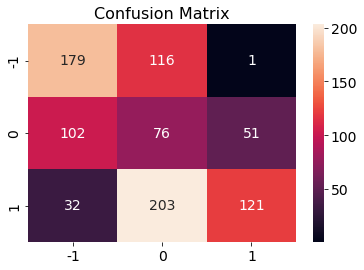

In [ ]:
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font sizes
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams.update({'font.size': 14})

# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="d")

# Set the axis labels
ax.xaxis.set_ticklabels(['-1', '0', '1'])
ax.yaxis.set_ticklabels(['-1', '0', '1'])
plt.show()

In [ ]:
# Calculate the classification report
cr = classification_report(y[split:], y_predict)
print(cr)

              precision    recall  f1-score   support

          -1       0.57      0.60      0.59       296
           0       0.19      0.33      0.24       229
           1       0.70      0.34      0.46       356

    accuracy                           0.43       881
   macro avg       0.49      0.43      0.43       881
weighted avg       0.52      0.43      0.45       881

